Sklearn 中的 Cross Validation (交叉验证)对于我们选择正确的 Model 和 Model 的参数是非常有帮助的， 有了他的帮助，我们能直观的看出不同 Model 或者参数对结构准确度的影响。

# Model 基础验证法 

In [1]:
from sklearn.datasets import load_iris  # iris数据集
from sklearn.model_selection import train_test_split  # 分割数据模块
# K最近邻(kNN，k-NearestNeighbor)分类算法
from sklearn.neighbors import KNeighborsClassifier

# 加载iris数据集
iris = load_iris()
X = iris.data
y = iris.target

# 分割数据并
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=4)

# 建立模型
knn = KNeighborsClassifier()

# 训练模型
knn.fit(X_train, y_train)

# 将准确率打印出
print(knn.score(X_test, y_test))

0.9736842105263158


# Model 交叉验证法(Cross Validation)

In [2]:
from sklearn.model_selection import cross_val_score  # K折交叉验证模块

# 使用 K 折交叉验证模块
scores = cross_val_score(knn, X, y, cv=5, scoring='accuracy')

# 将5次的预测准确率打印出
print(scores)
# [ 0.96666667  1.          0.93333333  0.96666667  1.        ]

# 将5次的预测准确平均率打印出
print(scores.mean())

[0.96666667 1.         0.93333333 0.96666667 1.        ]
0.9733333333333334


# 以准确率(accuracy)判断

一般来说准确率(accuracy)会用于判断分类(Classification)模型的好坏。

Populating the interactive namespace from numpy and matplotlib


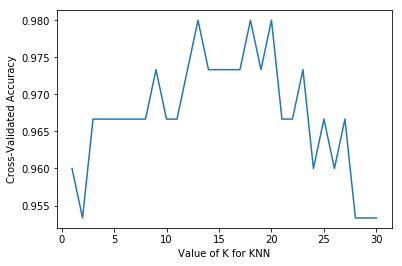

In [3]:
%pylab inline
# 建立测试参数集
k_range = range(1, 31)

k_scores = []

# 藉由迭代的方式来计算不同参数对模型的影响，并返回交叉验证后的平均准确率
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, y, cv=10, scoring='accuracy')
    k_scores.append(scores.mean())

# 可视化数据
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

从图中可以得知，选择 $12-18$ 的 `k` 值最好。高过 $18$ 之后，准确率开始下降则是因为过拟合(Over fitting)的问题。

# 以平均方差(Mean squared error) 

一般来说平均方差(Mean squared error)会用于判断回归(Regression)模型的好坏。

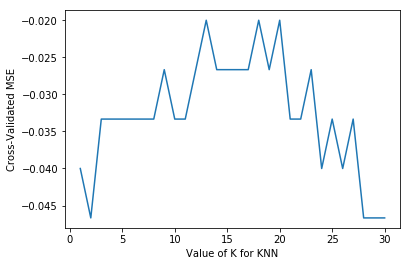

In [4]:
k_range = range(1, 31)
k_scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    loss = cross_val_score(knn, X, y, cv=10, scoring='neg_mean_squared_error')
    k_scores.append(loss.mean())

plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated MSE')
plt.show()

由图可以得知，平均方差越低越好，因此选择 $13-18$ 左右的 K 值会最好。

# Learning curve 检视过拟合 

`sklearn.learning_curve` 中的 learning curve 可以很直观的看出我们的 model 学习的进度, 对比发现有没有 overfitting 的问题. 然后我们可以对我们的 model 进行调整, 克服 overfitting 的问题.

In [5]:
from sklearn.model_selection import learning_curve #学习曲线模块
from sklearn.datasets import load_digits #digits数据集
from sklearn.svm import SVC #Support Vector Classifier
import matplotlib.pyplot as plt #可视化模块
import numpy as np

加载 digits 数据集，其包含的是手写体的数字，从 $0$ 到 $9$。数据集总共有 $1797$ 个样本，每个样本由 $64$ 个特征组成， 分别为其手写体对应的 $8\times 8$ 像素表示，每个特征取值 $0-16$。

In [6]:
digits = load_digits()
X = digits.data
y = digits.target

观察样本由小到大的学习曲线变化, 采用 K 折交叉验证 `cv=10`, 选择平均方差检视模型效能 `scoring='neg_mean_squared_error'`, 样本由小到大分成 $5$ 轮检视学习曲线($10\%$, $25\%$, $50\%$, $75\%$, $100\%$):

In [7]:
train_sizes, train_loss, test_loss = learning_curve(
    SVC(gamma=0.001),
    X,
    y,
    cv=10,
    scoring='neg_mean_squared_error',
    train_sizes=[0.1, 0.25, 0.5, 0.75, 1])

# 平均每一轮所得到的平均方差(共5轮，分别为样本10%、25%、50%、75%、100%)
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

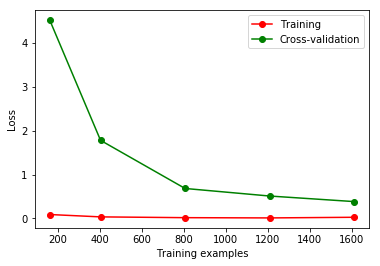

In [8]:
plt.plot(train_sizes, train_loss_mean, 'o-', color="r",
         label="Training")
plt.plot(train_sizes, test_loss_mean, 'o-', color="g",
         label="Cross-validation")

plt.xlabel("Training examples")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

# validation_curve 检视过拟合 

做 `validation_curve`, 用这一种曲线我们就能更加直观看出改变模型中的参数的时候有没有过拟合(overfitting)的问题了.

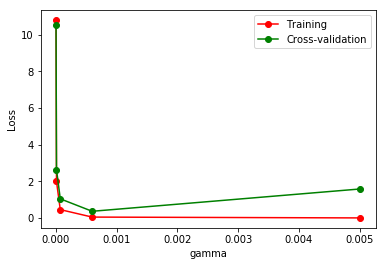

In [9]:
from sklearn.model_selection import validation_curve  # validation_curve模块
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib.pyplot as plt
import numpy as np

# digits数据集
digits = load_digits()
X = digits.data
y = digits.target

# 建立参数测试集
param_range = np.logspace(-6, -2.3, 5)

# 使用validation_curve快速找出参数对模型的影响
train_loss, test_loss = validation_curve(
    SVC(), X, y, param_name='gamma', param_range=param_range, cv=10, scoring='neg_mean_squared_error')

# 平均每一轮的平均方差
train_loss_mean = -np.mean(train_loss, axis=1)
test_loss_mean = -np.mean(test_loss, axis=1)

# 可视化图形
plt.plot(param_range, train_loss_mean, 'o-', color="r",
         label="Training")
plt.plot(param_range, test_loss_mean, 'o-', color="g",
         label="Cross-validation")

plt.xlabel("gamma")
plt.ylabel("Loss")
plt.legend(loc="best")
plt.show()

由图中可以明显看到 `gamma` 值大于 $0.001$，模型就会有过拟合(Overfitting)的问题。